In [1]:
!pip install -q transformers

     |████████████████████████████████| 4.4 MB 5.2 MB/s 
     |████████████████████████████████| 596 kB 61.8 MB/s 
     |████████████████████████████████| 101 kB 10.6 MB/s 
     |████████████████████████████████| 6.6 MB 33.8 MB/s 


In [2]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image as img
from IPython.display import Image, display

In [3]:
FILE_NAME = 'image.jpg'

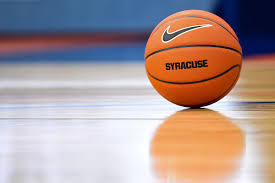

In [4]:
display(Image(FILE_NAME, width = 700, height = 400))

In [5]:
image_array = img.open('image.jpg')

In [6]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/68.0k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/330M [00:00<?, ?B/s]

Extract Features

In [7]:
inputs = feature_extractor(images = image_array, 
                           return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

Make Predictions

In [8]:
predicted_class_idx = logits.argmax(-1).item()

In [9]:
print(predicted_class_idx)

430


In [10]:
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: basketball
